# Import libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Import the dataset 

In [15]:
df=pd.read_csv('SeoulBikeData.csv',encoding='ISO-8859-1')

##### This dataframe presents the rented bike count in this city of Seoul. It is presented as a time series which presents the data with a step of an hour.   
For each hour, the dataframe mainly presents weather conditions and information about the day.  


In [16]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [17]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Step 1 : Exploratory Data Analysis and Preprocessing

In [18]:
print('The DataFrame contains {} lines and {} columns because in a day we have 24 hours and we have 365 days a year so 365*24 = 8760, which represents the number of lines'.format(df.shape[0],df.shape[1]))

The DataFrame contains 8760 lines and 14 columns because in a day we have 24 hours and we have 365 days a year so 365*24 = 8760, which represents the number of lines


### Variable prensentation
Here are all the columns of the DataSet :  

<li>Date : The day of the day, during 365 days, type : str                  
<li>Rented Bike Count : Number of rented bikes per hour which is the target, type : int 
<li>Hour: The hour of the day, type : int
<li>Temperature(°C): Temperature per hour, type : Float
<li>Humidity(%): Humidity in the air in %, type : int            
<li>Wind speed (m/s) : Speed of the wind in m/s, type : Float
<li>Visibility (10m): Visibility in m, type : int
<li>Dew point temperature(°C): Temperature at the beggining of the day, type : Float
<li>Solar Radiation (MJ/m2): Sun contribution, type : Float
<li>Rainfall(mm): Amount of rain in mm, type : Float
<li>Snowfall (cm): Amount of snow in cm, type : Float
<li>Seasons: Season of the year, type : str
<li>Holiday: If it is holiday period, type: str
<li>Functioning Day: If it is a Functioning Day, type : str

##### We mainly have numeric values, datetime and str 

In [19]:
df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object


##### Here is the statitical description of the features

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


#####  Verify that there are no missing values

In [21]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### We convert as datetime the series 'Date'

In [22]:
df['Date']=pd.to_datetime(df['Date'],format="%d/%m/%Y")

####   

## Here are the correlations between variables 

#### We can see that on the target variable line the most correlated variables to the rent are : 
<li>the hour
<li>the temperature
<li>the dew point temperature
<li>the solar radiation

##### (The dew point is a temperature which is so cold that the vapor becomes liquid)

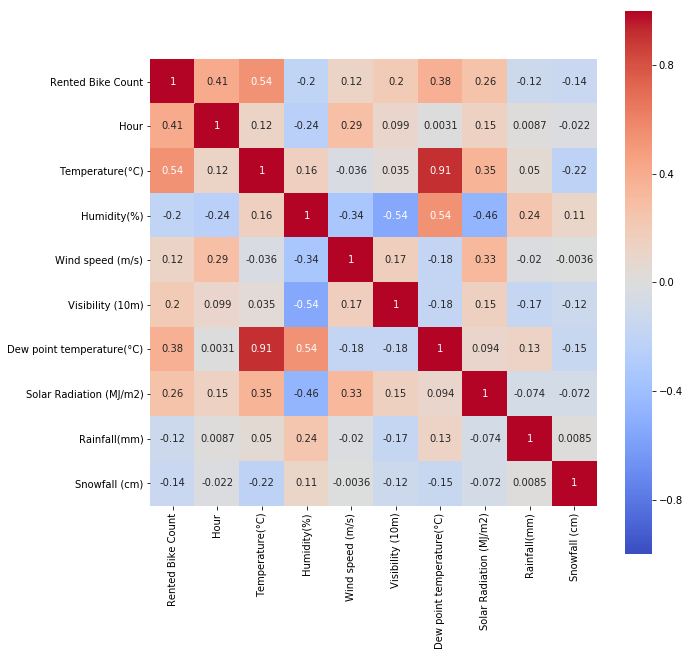

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

#### We see that there is a hyper correlation between columns 'Temperature(°C)' and 'Dew point temperature(°C)'  so we can drop the column 'Dew point temperature(°C)'. And they have the same variations.

In [24]:
df=df.drop(['Dew point temperature(°C)'],axis=1)

#### This is the list of sorted correlation of variables to the target

In [27]:
df1Corr=pd.DataFrame(df.corr().unstack().sort_values(ascending=False)['Rented Bike Count'],columns=['Correlation to the target'])
df1Corr.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Correlation to the target
Rented Bike Count,1.000000
Temperature(°C),0.538558
Hour,0.410257
Solar Radiation (MJ/m2),0.261837
Visibility (10m),0.199280
Wind speed (m/s),0.121108
Rainfall(mm),-0.123074
Snowfall (cm),-0.141804
Humidity(%),-0.199780


####  

# Step 2 : Data Preparation and data Visualisation using Matplotlib and seaborn





## Creating variables 

#### Variable which informs us if it is night or day

In [28]:
df['label_day_night']=df['Hour'].apply(lambda x : 'Night' if (x >20 or x<5) else( 'Day'))

###### We create a column feature which gives the day of the week and the month corresponding to the date

In [29]:
df['WeekDay']=df["Date"].dt.day_name() 


In [30]:
df['Month']=df['Date'].dt.month

## Plotting variables to the target 

#### On this first plot, we see a high raise between april to autumn of bikes rent

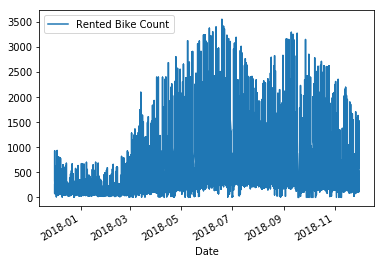

In [31]:
df.plot(x='Date',y='Rented Bike Count',kind='line')

#### So let's focus on the seasons where we have the most rents
###### We can see that as we expected, summer is the season in which we have the most rents.
Let's try to understand why summer is the season with the most rents

In [32]:
df1VizSeasons=pd.DataFrame(df.groupby('Seasons').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizSeasons.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
Seasons,
Summer,2283234
Autumn,1790002
Spring,1611909
Winter,487169


###### Let's verify that it is linked to the solar Radiation
This plot explains the high correlation with the feature 'solar Radiation' and 'Summer'

In [33]:
df1VizSolarRadiation=pd.DataFrame(df.groupby('Seasons').sum()['Solar Radiation (MJ/m2)'].sort_values(ascending=False))
df1VizSolarRadiation.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Solar Radiation (MJ/m2)
Seasons,
Summer,1680.850000
Spring,1520.840000
Autumn,1139.650000
Winter,644.070000


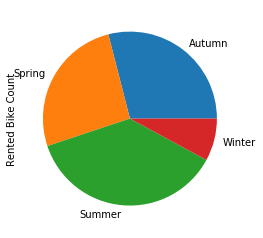

In [34]:
df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()

#### Here the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000

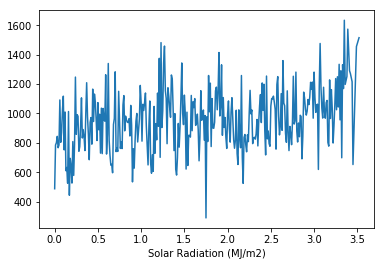

In [35]:
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

#### Here we have a repartition of the rents by hour, at the beginning of the day we suppose people go to work and return by bike 

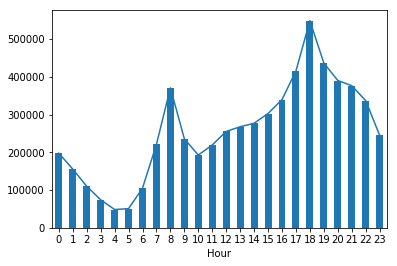

In [36]:
df.groupby('Hour').sum()['Rented Bike Count'].plot.bar()
df.groupby('Hour').sum()['Rented Bike Count'].plot()

#### Days with highest rented bike are week days
So we suppose people rent bikes to go to work or school 

In [37]:
df1VizDays=pd.DataFrame(df.groupby('WeekDay').sum()['Rented Bike Count'].sort_values(ascending=False))
df1VizDays.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Rented Bike Count
WeekDay,
Friday,950334
Wednesday,923956
Monday,911743
Saturday,885492
Thursday,861999
Tuesday,858596
Sunday,780194


####  

#### Korean people like to ride bikes when it is pretty hot around 25°C in average

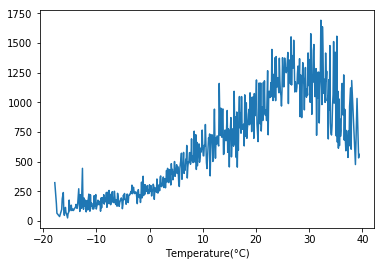

In [38]:
df.groupby('Temperature(°C)').mean()['Rented Bike Count'].plot()

##### Let's see the repartition of the rents follonwing the moment of the day

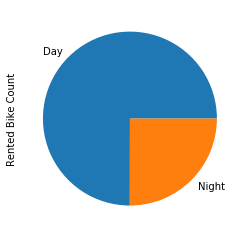

In [39]:
df.groupby('label_day_night').sum()['Rented Bike Count'].plot.pie()

#### According to this boxplot there are much more rents during the day than the night 
As the median for the day is around 600 and the median for the night is around 350

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


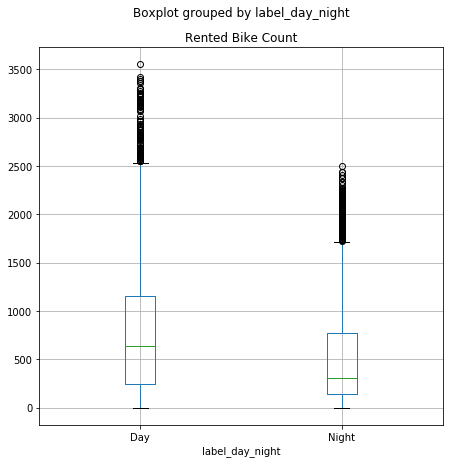

In [40]:
boxplotDay_night= df.boxplot(['Rented Bike Count'],by='label_day_night',figsize=(7,7))



#### Let's do a visualisation during the holidays
It means that koreans rent bikes to go to school or work 

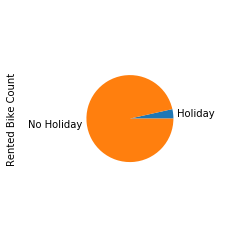

In [41]:
df.groupby('Holiday').sum()['Rented Bike Count'].plot.pie(radius=0.5)


#### We see that holiday rent are very low so let's see on which period extends holidays
The shape of this Df is 432 lines and 16 columns, it means that there are only 18 days of holidays in Korea which is very short. And that explains why the proportion of rents during holiday is low. So we understand that this column is not that important

In [42]:
dfHoliday=df.loc[df['Holiday'] == 'Holiday']

In [43]:
dfHoliday.shape

(432, 16)

### Let's plot the rent of bikes following the state of the  weather

#### We can see that even if it rains a lot of korean rent bikes, here for example even if we have 20 mm of rain there is a big peak of rented bikes

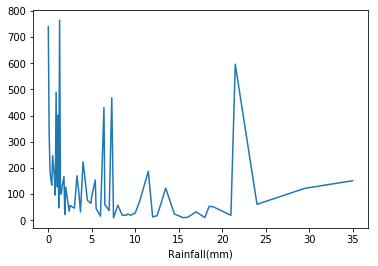

In [44]:
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

#### This raise between 20 and 25 mm of rainfall seems very contradictory, so we decide to explain this
We can see that these days of rainfall are in the summer and the T° is not bad, furthermore theses are Week Days, that's why we have so much rented bike even if the rain is so important

In [45]:
df.loc[(df['Rainfall(mm)']>20)&(df['Rainfall(mm)']<25)]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,label_day_night,WeekDay,Month
5034,2018-06-28,596,18,20.6,97,0.7,222,0.14,21.5,0.0,Summer,No Holiday,Yes,Day,Thursday,6
5132,2018-07-02,61,20,23.5,97,0.1,1814,0.04,24.0,0.0,Summer,No Holiday,Yes,Day,Monday,7
6524,2018-08-29,19,20,23.4,98,0.6,70,0.00,21.0,0.0,Summer,No Holiday,Yes,Day,Wednesday,8


#### We can see on the y-axis, the amount of rents is very low
When we have more than 4 cm of snow, the bike rents is much lower

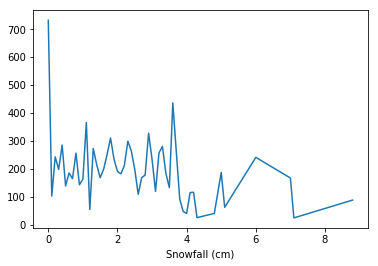

In [46]:
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

#### We create the variable to encode WeekDay 

In [47]:
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['WeekDayEncoding']=df['WeekDay'].map(mapping_dictDay)

####    

####  

# Step 3 : Modeling
We have to keep in mind that the most correlated features to the target are : 

<li>the hour </li>
<li>the temperature </li>
<li>the solar radiation</li>

We have to drop some features that are not important to our target 

####  

#### Let's import libraires needed in this modeling part

In [48]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor


#### Let's create an object to report results

In [49]:
reporting={}

In [50]:
X_MultipleLinearRegression=df.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'],axis =1)
y=df.iloc[:,1] #the target


In [51]:
X_train,X_test,y_train,y_test=train_test_split(X_MultipleLinearRegression,y,test_size=0.27)

## Mutiple Linear Regression 

We tried to drop some of the features of the X_train_MultipleRegression to see if the score rised but it was not the case. So we kept the feature selection with the best score
Furthermore, we don't scale data in Linear Regression, but if we did we would first have to split into train and test set

In [52]:
regr = linear_model.LinearRegression()
fitregr=regr.fit(X_train, y_train)
predregrtrain=fitregr.predict(X_train)
predregrtest=fitregr.predict(X_test)

In [53]:
print('The equation of this Linear Regression has format : y= coefficient*Features + intercept')
print('Linear model intercept: {} and the coefficients are: {}'
     .format(fitregr.intercept_,fitregr.coef_))

The equation of this Linear Regression has format : y= coefficient*Features + intercept
Linear model intercept: 438.0868481936782 and the coefficients are: [ 2.76148778e+01  3.08747989e+01 -7.70343804e+00  9.47488991e+00
  1.46052312e-02 -8.71238206e+01 -5.85198059e+01  1.66706928e+01
  7.87735463e+00 -9.11887998e+00]


After fitting the model, we print the score between predictions and test targets

In [54]:
train_set_rmse = (np.sqrt(mean_squared_error(predregrtrain,y_train )))
train_set_r2 = r2_score(y_train, predregrtrain)
print('Linear model, R2 train score is : {} and the train root mean square is: {}'
     .format(train_set_r2,train_set_rmse))

test_set_rmse = (np.sqrt(mean_squared_error(predregrtest,y_test )))
test_set_r2 = r2_score(y_test, predregrtest)
print('Linear model, R2 test score is : {} and the test root mean square is: {}'
     .format(test_set_r2,test_set_rmse))

Linear model, R2 train score is : 0.4729147422951254 and the train root mean square is: 465.03999659462045
Linear model, R2 test score is : 0.47201385771404825 and the test root mean square is: 477.1770761977524


In [55]:
reporting['Linear regression']=test_set_r2

This is a test to predict the rented bikes following features selected :   
The order of the features in this test are :  
### [Hour (0 to 24) , Temperature (°C) , Humidity(%) , Wind speed (m/s) , Visibility(m) , Solar radiation (MJ/m2) , Rainfall(mm) , Snowfall(cm) , month(1 to 12) , WeekDay(1 to 7 : monday to Sunday)]

In [56]:
#fitregr.predict([[10,10,60,3,1000,0,0,2,12,1]])

####  

## Ridge regression
What is Ridge regression ? The main idea begin Ridge Regression is to find a new line that doesn't fit the training data. Ridge regression can provide better long term regression. The goal of the regularization parameter alpha is to reduce the variation
Ridge regression is interesting when we have only very interesting features on the dataset.

In [57]:
X_RidgeRegression=df.drop(['Rented Bike Count','Date','Seasons','Holiday','label_day_night','Functioning Day','WeekDay'],axis =1)
y=df.iloc[:,1] #the target
X_train,X_test,y_train,y_test=train_test_split(X_RidgeRegression,y,test_size=0.27)

Let's test the values of the Ridge in function of the alpha value
The R2 test highest value is 0.47, which is the same result as we had in the Linear Regression


In [58]:
errors=[]
coefs=[]
alphas=[-2000,-1000, 0, 10, 20, 50, 6000, 1000000]
for alpha in alphas:
    linridge = Ridge(alpha = alpha).fit(X_train, y_train)
    r2_train = linridge.score(X_train, y_train)
    r2_test = linridge.score(X_test, y_test)
    coefs.append(linridge.coef_)
    errors.append(np.mean((linridge.predict(X_test)-y_test)**2))
    print('Alpha = {:.2f}\n \
R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(alpha, r2_train, r2_test))


Alpha = -2000.00
 R2 training: 0.31, R2 test: 0.29

Alpha = -1000.00
 R2 training: 0.37, R2 test: 0.34

Alpha = 0.00
 R2 training: 0.48, R2 test: 0.46

Alpha = 10.00
 R2 training: 0.48, R2 test: 0.46

Alpha = 20.00
 R2 training: 0.48, R2 test: 0.46

Alpha = 50.00
 R2 training: 0.48, R2 test: 0.46

Alpha = 6000.00
 R2 training: 0.47, R2 test: 0.46

Alpha = 1000000.00
 R2 training: 0.32, R2 test: 0.31



Grid Search on Ridge, we find the same result as the previous test

In [59]:
ridge=Ridge()
#parameters={'alpha':[-10000,-6000,-100,-200, 1, 10, 20, 50,100,150,200, 600, 1000000]}
parameters={'alpha':list(range(-300,300))}

gridSearchRidge=GridSearchCV(ridge,parameters,scoring='r2',cv=3)
gridSearchRidge.fit(X_train,y_train)


GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [-300, -299, -298, -297, -296, -295, -294,
                                   -293, -292, -291, -290, -289, -288, -287,
                                   -286, -285, -284, -283, -282, -281, -280,
                                   -279, -278, -277, -276, -275, -274, -273,
                                   -272, -271, ...]},
             scoring='r2')

In [60]:
best_ridge=gridSearchRidge.best_estimator_
bestridge_testScore=best_ridge.score(X_test,y_test)


In [61]:
print('The best R2 train score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(gridSearchRidge.best_score_,gridSearchRidge.best_params_['alpha']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestridge_testScore,gridSearchRidge.best_params_['alpha']))

The best R2 train score is : 0.48
 with Alpha = 46.00
 
The best R2 test score is : 0.46
 with Alpha = 46.00
 


In [62]:
reporting['Ridge regression']=bestridge_testScore

In [63]:
#gridSearchRidge.predict([[10,10,60,3,1000,0,0,2,12,1]])[0]

We see that when alpha is very large, it tends to 0

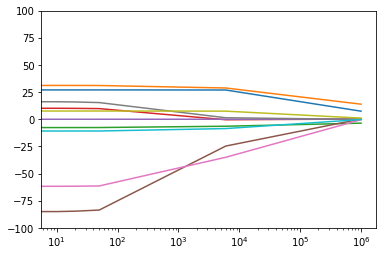

In [64]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_ylim(-100,100)
plt.show()

## Lasso 
Lasso regression is a little bit different from Ridge regression.
When lambda=0, the lasso regression is the same as the least squares line, when lambda increases, the slope gets smaller. 
Unlike RIdge regression, Lasso can exclude useless features from the model because it reduce variance.

In [65]:
errors=[]
coefs=[]
alphas=[-60, 0, 10, 20, 50, 6000, 1000000]
for alpha in alphas:
    linLasso = Lasso(alpha = alpha).fit(X_train, y_train)
    r2_train = linLasso.score(X_train, y_train)
    r2_test = linLasso.score(X_test, y_test)
    coefs.append(linLasso.coef_)
    errors.append(np.mean((linLasso.predict(X_test)-y_test)**2))
    print('Alpha = {:.2f}\n \
Lasso R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(alpha, r2_train, r2_test))

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2591455193.360839, tolerance: 264012.43700345635
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 691029071.7502341, tolerance: 264012.43700345635
  positive)


Alpha = -60.00
 Lasso R2 training: 0.37, R2 test: 0.35

Alpha = 0.00
 Lasso R2 training: 0.48, R2 test: 0.46

Alpha = 10.00
 Lasso R2 training: 0.48, R2 test: 0.46

Alpha = 20.00
 Lasso R2 training: 0.47, R2 test: 0.46

Alpha = 50.00
 Lasso R2 training: 0.46, R2 test: 0.45

Alpha = 6000.00
 Lasso R2 training: 0.04, R2 test: 0.03

Alpha = 1000000.00
 Lasso R2 training: 0.00, R2 test: -0.00



Grid Search on Lasso, we find the same result as the previous test

In [66]:
lasso=Lasso()
#parameters={'alpha':[-10000,-6000,-100,-200, 1, 10, 20, 50,100,150,200, 600, 1000000]}
parameters={'alpha':list(range(-300,300))}

gridSearchLasso=GridSearchCV(lasso,parameters,scoring='r2',cv=4)
gridSearchLasso.fit(X_train,y_train)



best_Lasso=gridSearchLasso.best_estimator_
bestLasso_testScore=best_Lasso.score(X_test,y_test)



C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1976953163.7291207, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1983956762.5391922, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1911205036.791418, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1996438952.6494694, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1979651499.8021884, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1987805896.463132, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1914780576.0740185, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1999215775.85531, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1982349835.875269, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1995023022.569159, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1916687530.358039, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2001992599.0606642, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1998872156.4930725, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1918594484.6420784, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2004769422.2666898, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1920501438.9258919, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2007546245.4724226, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1990444844.0945258, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1922408393.2101488, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2010323068.6779466, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1993143180.167593, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2010419558.263473, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1924315347.4941673, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2013099891.8838239, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2014268692.1869187, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1926222301.77821, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2015876715.0893116, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2000900896.377712, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2018117826.1103954, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1928129256.0622628, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2021083258.600184, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2003599232.4507952, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2021966960.0338368, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2023860081.805923, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2006297568.5238342, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2025816093.9573164, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1933611749.628839, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2026636905.0115955, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2008995904.5969505, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2033033220.0638223, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1935518703.9128716, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2029413728.2173073, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2036882353.9870942, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1937425658.1969073, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2032190551.4229932, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2034620271.727714, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2016753620.8070698, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2040731487.9106946, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2044099480.0937052, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1941001197.4794784, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2037397094.9335332, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2047948614.0171225, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1919444862.2913857, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2014778108.5537744, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2000158704.669569, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2029480481.7088022, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1922475806.4902601, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2022265712.8056822, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2004082330.4205298, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2034452496.9518728, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2026259101.740018, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2008005956.171451, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2039424512.1954253, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1931189771.06198, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2030252490.6741748, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2011929581.9224257, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2048747040.7765923, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1934220715.2608654, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1819554182.5006433, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1827455329.2789977, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2053719056.0199084, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1727045245.198666, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1852200970.007218, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1844167691.7583587, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1876411936.5930734, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1759004067.3541474, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1869612590.0110025, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1860880054.2377124, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1910146849.2817712, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1776048772.5037782, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1887024210.0146039, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1892215733.8865716, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1928138802.7159586, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1793093477.6533766, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1908928096.365958, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1946130756.1499913, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1810138182.8029413, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1937082617.5249705, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1925640458.84533, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1964122709.5840037, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1842097004.9584894, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1926281606.8820248, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1942352821.3246531, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1859141710.1080825, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1947112939.6911795, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1959065183.8040748, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1973688500.9734583, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2015849575.7067454, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1876186415.2577024, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1976907229.7624536, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2033841529.1407435, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1882447361.0080347, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the num

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1996189808.1827803, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2043041404.3325024, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1901546115.567103, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2027834354.3271217, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2015472386.6031723, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2063102082.0588717, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numb

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2048665687.1362782, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2034745709.186423, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2083162759.7852116, tolerance: 202219.9535969969
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1956452124.433919, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2069493860.508136, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2054032401.3126054, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1975552995.7132044, tolerance: 191615.72795852792
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2090327491.086608, tolerance: 200123.5302821518
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2073319093.437986, tolerance: 198064.4263844421
  positive)
C:\Users\TRANG THOMAS\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the numbe

In [67]:
print('The best R2 train score is : {:.2f} with Alpha = {:.2f}\n \
'.format(gridSearchLasso.best_score_,gridSearchLasso.best_params_['alpha']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestLasso_testScore,gridSearchLasso.best_params_['alpha']))


The best R2 train score is : 0.47 with Alpha = 1.00
 
The best R2 test score is : 0.46
 with Alpha = 1.00
 


In [68]:
reporting['Lasso regression']=bestLasso_testScore

We see all the coef when the alphas raise, our coeficients converge to 0

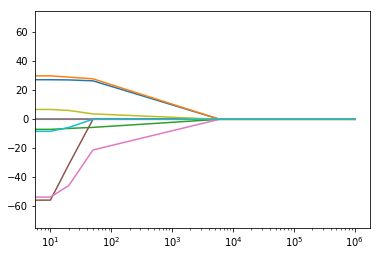

In [69]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_ylim(-75,75)
plt.show()


## SVR regression

In [70]:
C=[ 10,50,80,100, 500,600,800,1000,1400,1800,2200 ]
for i in C:
    svr_Model = SVR(C = i).fit(X_train, y_train)
    r2_train_svr = svr_Model.score(X_train, y_train)
    r2_test_svr=svr_Model.score(X_test, y_test)
    print('C = {:.2f}\n \
SVR R2 training: {:.2f}, R2 test: {:.2f}\n'
         .format(i, r2_train_svr, r2_test_svr))

C = 10.00
 SVR R2 training: -0.02, R2 test: -0.04

C = 50.00
 SVR R2 training: 0.02, R2 test: -0.01

C = 80.00
 SVR R2 training: 0.04, R2 test: 0.01

C = 100.00
 SVR R2 training: 0.05, R2 test: 0.02

C = 500.00
 SVR R2 training: 0.22, R2 test: 0.19

C = 600.00
 SVR R2 training: 0.25, R2 test: 0.22

C = 800.00
 SVR R2 training: 0.29, R2 test: 0.27

C = 1000.00
 SVR R2 training: 0.32, R2 test: 0.30

C = 1400.00
 SVR R2 training: 0.36, R2 test: 0.33

C = 1800.00
 SVR R2 training: 0.38, R2 test: 0.35

C = 2200.00
 SVR R2 training: 0.39, R2 test: 0.36



In [71]:
svr_Model=SVR()

param = {'C' : [800,1000,1400,1800,2200]}

gridSearchSVR=GridSearchCV(svr_Model,param,scoring='r2',cv=5)
gridSearchSVR.fit(X_train,y_train)


best_SVR=gridSearchSVR.best_estimator_
bestSVR_testScore=best_SVR.score(X_test,y_test)


In [72]:
print('The best R2 train score is : {:.2f} with C = {:.2f}\n \
'.format(gridSearchSVR.best_score_,gridSearchSVR.best_params_['C']))
print('The best R2 test score is : {:.2f}\n with Alpha = {:.2f}\n \
'.format(bestSVR_testScore,gridSearchSVR.best_params_['C']))

The best R2 train score is : 0.37 with C = 2200.00
 
The best R2 test score is : 0.36
 with Alpha = 2200.00
 


In [73]:
reporting['SVR']=gridSearchSVR.best_score_

## Decision Tree Regressor
We first need to standartize data

In [74]:
scalerTrain = preprocessing.StandardScaler().fit(X_train)
scalerTest = preprocessing.StandardScaler().fit(X_test)
X_train_Scaled=scalerTrain.transform(X_train)
X_test_Scaled=scalerTest.transform(X_test)


In [75]:
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)
gridSearch_decisionTree.fit(X_train_Scaled,y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test_Scaled,y_test)



In [76]:
print('The best Decision Tree R2 score is : {:.2f} with max depth = {:.2f} \n \
'.format(gridSearch_decisionTree.best_score_,gridSearch_decisionTree.best_params_['max_depth'] ))
print('The best R2 test score is : {:.2f}\n with max depth = {:.2f}\n \
'.format(bestDecisionTree_testScore,gridSearch_decisionTree.best_params_['max_depth']))

The best Decision Tree R2 score is : 0.71 with max depth = 8.00 
 
The best R2 test score is : 0.70
 with Alpha = 8.00
 


In [77]:
reporting['Decision Tree Regressor']=bestDecisionTree_testScore

## Random Forest Regressor

In [78]:
randomForestAlgo = RandomForestRegressor()


param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=100, num=10)], 
         'max_depth' : [60,70,80,90,100],
         'min_samples_split':[2,4,6,8],
         'min_samples_leaf':[1,2,3,4],
         'bootstrap' : [True,False]
        }

gridSearch_RandomForest=GridSearchCV(randomForestAlgo,param,scoring='r2',cv=5)
gridSearch_RandomForest.fit(X_train_Scaled,y_train)

best_randomForest=gridSearch_RandomForest.best_estimator_
bestRandomForest_testScore=best_randomForest.score(X_test_Scaled,y_test)


this is how we predict the target of one day with its features

In [79]:
#best_randomForest.predict([[10,10,60,3,1000,0,0,2,12,1]])[0]

In [80]:
print('The best Random Forest R2 train score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_RandomForest.best_score_,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestRandomForest_testScore,gridSearch_RandomForest.best_params_['n_estimators'],gridSearch_RandomForest.best_params_['max_depth'],gridSearch_RandomForest.best_params_['min_samples_split'],gridSearch_RandomForest.best_params_['min_samples_leaf'] ))


The best Random Forest R2 train score is : 0.83 with n estimators = 90.00, max depth : 100.00, min samples split : 2 and min samples leaf : 1  
 
The best Random Forest R2 test score is : 0.82 with n estimators = 90.00, max depth : 100.00, min samples split : 2 and min samples leaf : 1  
 


In [81]:
reporting['Random Forest Regressor']=bestRandomForest_testScore

## Extra Trees Regressor

In [91]:
extraTreesAlgo = ExtraTreesRegressor()

param = {'n_estimators' : [int(x) for x in np.linspace(start=10,stop=170, num=10)], 
         'max_depth' : [50,60,70,80,90,100],
         'min_samples_split':[1,2,4,6,8],
         'min_samples_leaf':[1,2,3,4],
         'bootstrap' : [True,False]
        }

gridSearch_ExtraTrees=GridSearchCV(extraTreesAlgo,param,scoring='r2',cv=5)
gridSearch_ExtraTrees.fit(X_train_Scaled,y_train)

best_ExtrasTrees=gridSearch_ExtraTrees.best_estimator_
bestExtrasTrees_testScore=best_ExtrasTrees.score(X_test_Scaled,y_test)



In [92]:
#best_ExtrasTrees.predict([[10,10,60,3,1000,0,0,2,12,1]])[0]

In [93]:
print('The best Random Forest R2 score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(gridSearch_ExtraTrees.best_score_,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))
print('The best Random Forest R2 test score is : {:.2f} with n estimators = {:.2f}, max depth : {:.2f}, min samples split : {} and min samples leaf : {}  \n \
'.format(bestExtrasTrees_testScore,gridSearch_ExtraTrees.best_params_['n_estimators'],gridSearch_ExtraTrees.best_params_['max_depth'],gridSearch_ExtraTrees.best_params_['min_samples_split'],gridSearch_ExtraTrees.best_params_['min_samples_leaf'] ))

The best Random Forest R2 score is : 0.84 with n estimators = 180.00, max depth : 80.00, min samples split : 2 and min samples leaf : 1  
 
The best Random Forest R2 test score is : 0.83 with n estimators = 180.00, max depth : 80.00, min samples split : 2 and min samples leaf : 1  
 


In [94]:
reporting['Extra Trees Regressor']=bestExtrasTrees_testScore

# Present all the results of every model in a data frame and plot these in function of the model

In [95]:
df_results=pd.DataFrame()
df_results['model']=reporting.keys()
df_results['Score R2']=reporting.values()

In [96]:
df_results=df_results.set_index('model')

In [98]:
dfVizModels=pd.DataFrame(df_results['Score R2'].sort_values(ascending=False))
dfVizModels.style.background_gradient(cmap=sns.light_palette("red", as_cmap=True))

,Score R2
model,
Extra Trees Regressor,0.828773
Random Forest Regressor,0.819044
Decision Tree Regressor,0.702782
Linear regression,0.472014
Lasso regression,0.462381
Ridge regression,0.462287
SVR,0.373138


## The best model after grid search is the Extra Trees regressor with a R2 score of 0.83

 ###  

# Let's pickle the model with the best R2 in order to implement the API

In [65]:
import pickle 

save the model in a pickle file

In [66]:
pickle.dump(best_ExtrasTrees, open("model.pkl",'wb'))

load the model in a variable

In [67]:
model=pickle.load(open("model.pkl",'rb'))

Let's take this example, with theses values for the features

In [68]:
print(model.predict([[10,10,60,3,1000,0,0,2,12,1]])[0])

499.2857142857143
